<a href="https://colab.research.google.com/github/pdivya-mca/Logistic-Regression-Algorithm-Classification-Algorithm-ML/blob/main/Logistic_Regression_Algorithm_Classification_Algorithm_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraies
import pandas as pd # to handle data
from sklearn.model_selection import train_test_split # split the data
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df=pd.DataFrame(candidates,columns=['gmat','gpa','work_experience','admitted'])
print(df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [ ]:
#printing shape of dataset
df.shape

(40, 4)

In [ ]:
#fetching top 5 rows
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


## **Cleaning Dataset**

In [ ]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [ ]:
# checking for null values
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
#cheching for duplicates
df.duplicated().sum()

2

In [ ]:
#remove duplicates
df=df.drop_duplicates()

In [ ]:
#after removing duplicates checking for shape
df.shape

(38, 4)

In [ ]:
#checking for datatypes
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

## **Exploratory Data Analysis**

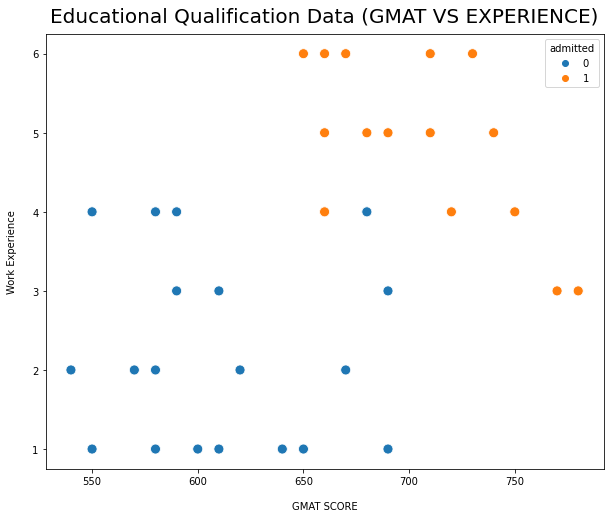

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='gmat',y='work_experience',hue='admitted', data=df,s=100)
plt.title("Educational Qualification Data (GMAT VS EXPERIENCE)", fontsize=20,y=1.015)
plt.xlabel("GMAT SCORE",labelpad=15)
plt.ylabel("Work Experience",labelpad=15)
ax=plt.gca()

High GMAT and high work experience --> admitted
if there is a linear decision boundary good to go with Logistic Regression model

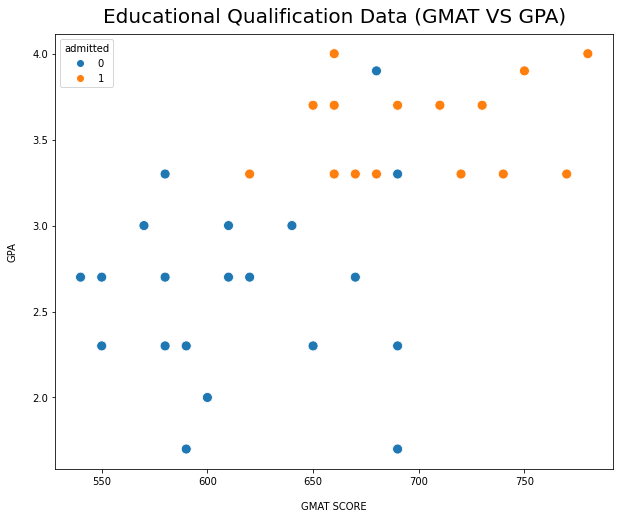

In [ ]:
#GMAT VS GPA
plt.figure(figsize=(10,8))
sns.scatterplot(x='gmat',y='gpa',hue='admitted', data=df,s=100)
plt.title("Educational Qualification Data (GMAT VS GPA)", fontsize=20,y=1.015)
plt.xlabel("GMAT SCORE",labelpad=15)
plt.ylabel("GPA",labelpad=15)
ax=plt.gca()

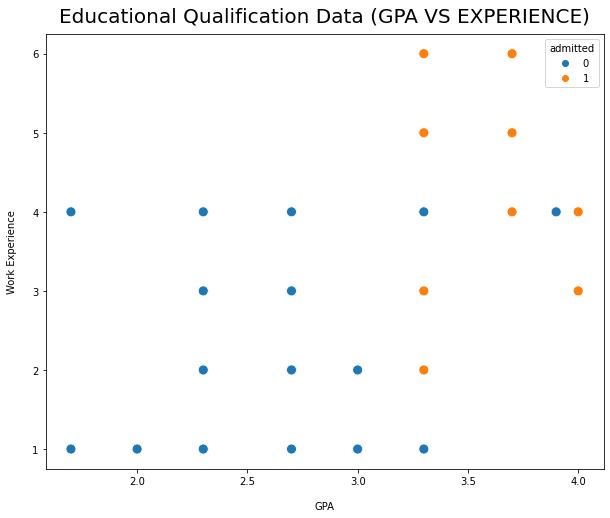

In [ ]:
# GPA vs Work Experience
plt.figure(figsize=(10,8))
sns.scatterplot(x='gpa',y='work_experience',hue='admitted', data=df,s=100)
plt.title("Educational Qualification Data (GPA VS EXPERIENCE)", fontsize=20,y=1.015)
plt.xlabel("GPA",labelpad=15)
plt.ylabel("Work Experience",labelpad=15)
ax=plt.gca()

**From the above visuals there is a linear decision boundary between all features so we can apply logistic regression boundary for this data set.**

## **Encode Data**
The data already in encode format. ie all the values are in number format.

## **Split Data**

In [ ]:
X=df[['gmat','gpa','work_experience']].values # all the features are converted into an array using dor values and store it in variable called X.
y=df['admitted'].values #target varibale
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) #train test split

In [ ]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1])

## **Scaling Data**
Scaling is not mandatory for logistic regression algorithm

## **Model - Apply Logistic Regression Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
#The output of logistic regression algorithm is preicting probability of logistic regression
logistic_regression.predict_proba([[750, 3.5, 0]])

array([[0.85132078, 0.14867922]])

From  the above manual input gmat score 750 and gpa 3.5 and yr of exp is 0. the output we are predicting to join is 85 % not possible to get admitted 14 % of chace to get admitted.

In [ ]:
logistic_regression.predict_proba([[755,3.8,5]])

array([[0.0071233, 0.9928767]])

From the above example chance of getting admitted is very high percentage ie 99%

In [ ]:
#checking for the X_test
logistic_regression.predict_proba(X_test)

array([[0.99358847, 0.00641153],
       [0.99361785, 0.00638215],
       [0.97629546, 0.02370454],
       [0.99808923, 0.00191077],
       [0.09230136, 0.90769864],
       [0.98890341, 0.01109659],
       [0.5507087 , 0.4492913 ],
       [0.9778282 , 0.0221718 ],
       [0.06641408, 0.93358592],
       [0.5954611 , 0.4045389 ]])

**Finding the coefficiant**

In [ ]:
logistic_regression.coef_ # finding the best valu of m1,m2,m3

array([[0.04034957, 0.28659868, 1.27890116]])

**Finding the intercept**

In [ ]:
logistic_regression.intercept_ # finding value of c

array([-33.0102682])

y = 1/(1 + exp(-0.04 * gmat -0.28 * gpa - 1.27 * wexp + 33))

## **Evaluation Metric**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


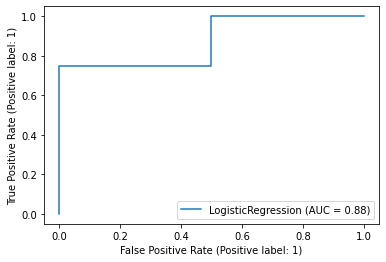

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
#f1_score(y_test,y_pred) # f1 score
#logistic_regression.score(X_test,y_test)
plot_roc_curve(logistic_regression, X_test, y_test) #AUROC
#accuracy_score(y_test,y_pred) #accuracy